Based on NetworkX tutorial: https://networkx.github.io/documentation/stable/tutorial.html

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

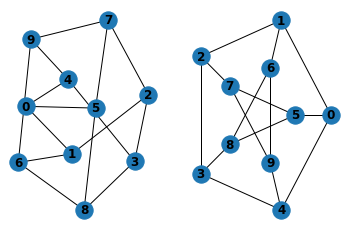

In [8]:
G = nx.petersen_graph()
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

Number of nodes: 5
Number of edges: 3
Nodes: ['m', 1, 2, 3, 'spam']
Edges: [('m', 3), (1, 2), (2, 3)]
Neighbors of node 1:  [2]
Neighbors of node 2:  [1, 3]
Neighbors of node 3:  ['m', 2]
Neighbors of node m:  [3]
Number of edges incident to 2:  2
[(2, 1), (2, 3), ('m', 3)]
[(2, 2), (1, 1)]


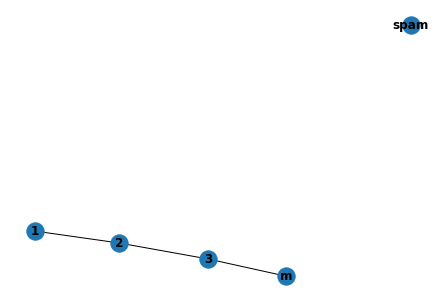

In [71]:
G = nx.Graph()

G.add_node(1)
G.add_nodes_from([2, 3])
G.add_node("spam")

G.add_edge(1,2)
e = (2, 3)
G.add_edge(*e) # unpack edge tuple
G.add_edge(3,'m')

print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

print("Nodes:", list(G.nodes))
print("Edges:", list(G.edges))

print("Neighbors of node 1: ", list(G.adj[1]))
print("Neighbors of node 2: ", list(G.neighbors(2)))
print("Neighbors of node 3: ", list(G.adj[3]))
print("Neighbors of node m: ", list(G.adj['m']))

print("Number of edges incident to 2: ", G.degree[2])

# Edges and degree from a subset of nodes
print(G.edges([2, 'm']))
print(G.degree([2, 1]))

nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

Nodes: [1, 2, 3]
Edges: [(1, 2), (1, 3)]
Edges of directed graph:  [(1, 2), (1, 3), (2, 1), (3, 1)]
{2: {}, 3: {}}
{}
{'color': 'blue'}


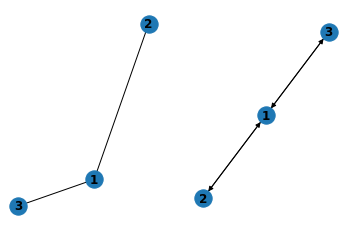

In [76]:
G = nx.Graph()
G.add_edges_from([(1,2),(1,3)])

print("Nodes:", list(G.nodes))
print("Edges:", list(G.edges))

# Create a DiGraph using the conncections from G
H = nx.DiGraph(G)

print("Edges of directed graph: ", list(H.edges()))

plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')

plt.subplot(122)
nx.draw(H, with_labels=True, font_weight='bold')

# Neighboring nodes (with edge info) of node 1
print(H[1])
# Info of edge between nodes 1 and 2
print(H[1][2])

H[1][2]['color'] ='blue'
print(H[1][2])

(1, 2, 0.125)
(1, 3, 0.750)
(2, 1, 0.125)
(2, 4, 1.200)
(3, 1, 0.750)
(3, 4, 0.375)
(4, 2, 1.200)
(4, 3, 0.375)
---------------------------------
(1, 2, 0.125)
(1, 3, 0.750)
(2, 4, 1.200)
(3, 4, 0.375)


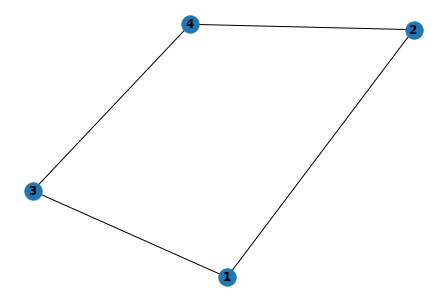

In [87]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
nx.draw(FG, with_labels=True, font_weight='bold')

for n, nbrs in FG.adj.items():
    for nbr, eattr in nbrs.items():
        wt = eattr['weight']
        print('(%d, %d, %.3f)' % (n, nbr, wt))
        
# Access to all edges
print("---------------------------------")

for (u, v, wt) in FG.edges.data('weight'):
    print('(%d, %d, %.3f)' % (u, v, wt))
    

In [97]:
# Graph attributes
G = nx.Graph(type='STNU')
# or G.graph['type'] = 'STNU'
G.graph

# Node attributes
G.add_node(1, name='ST_t1') # Start time task 1
G.add_node(2, name='FT_t1') # Finish time task 1


# Edge attributes
G.add_edge(1, 2, weight=4.7)

print(G.nodes.data())

for (u, v, wt) in G.edges.data('weight'):
    print('(%d, %d, %.3f)' % (u, v, wt))
    

[(1, {'name': 'ST_t1'}), (2, {'name': 'FT_t1'})]
(1, 2, 4.700)


0.5
0.75
1.25
0.75


[2]

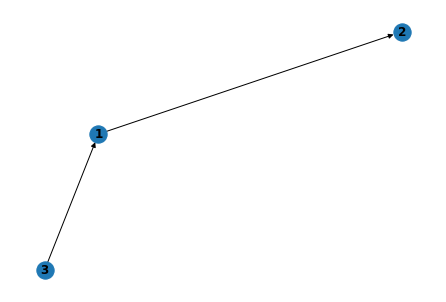

In [108]:
# Directed graphs
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
nx.draw(DG, with_labels=True, font_weight='bold')

print(DG.out_degree(1, weight='weight'))
print(DG.out_degree(3, weight='weight'))
print(DG.degree(1, weight='weight'))
print(DG.degree(3, weight='weight'))

list(DG.successors(1))

{1: defaultdict(<function networkx.algorithms.shortest_paths.dense.floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda>()>,
             {1: 0, 2: 0.5, 3: 1.0}),
 2: defaultdict(<function networkx.algorithms.shortest_paths.dense.floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda>()>,
             {1: 0.75, 2: 0, 3: 0.5}),
 3: defaultdict(<function networkx.algorithms.shortest_paths.dense.floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda>()>,
             {1: inf, 2: inf, 3: 0})}

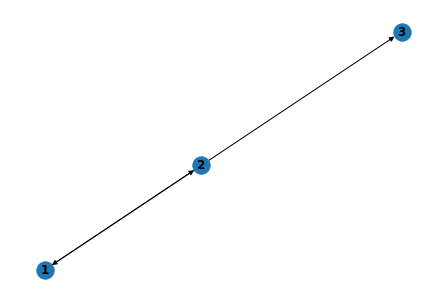

In [116]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (2, 1, 0.75), (2, 3, 0.5)])

nx.draw(DG, with_labels=True, font_weight='bold')

dict(DG.degree(weight='weight'))

nx.floyd_warshall(DG)

{1: defaultdict(<function floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda> at 0x7f666dcdb8c8>, {1: 0, 2: -1, 3: -2, 4: 0}), 2: defaultdict(<function floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda> at 0x7f666b35c2f0>, {1: 4, 2: 0, 3: 2, 4: 4}), 3: defaultdict(<function floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda> at 0x7f666b35cf28>, {1: 5, 2: 1, 3: 0, 4: 2}), 4: defaultdict(<function floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda> at 0x7f666b35c620>, {1: 3, 2: -1, 3: 1, 4: 0})}
0


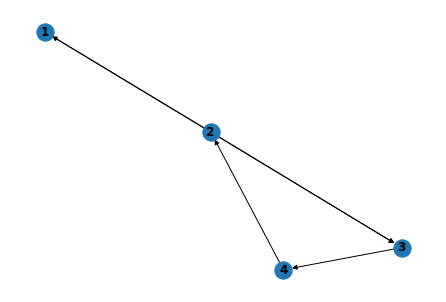

In [122]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 3, -2), (3, 4, 2),
                            (4, 2, -1), (2, 1, 4),
                            (2, 3, 3)])

nx.draw(DG, with_labels=True, font_weight='bold')

dict(DG.degree(weight='weight'))

distances = nx.floyd_warshall(DG)

print(distances)
print(distances[1][4])

{0: defaultdict(<function floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda> at 0x7f666b967268>, {0: -117, 1: -76, 2: -79, 3: -34, 4: -104}), 1: defaultdict(<function floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda> at 0x7f666b967bf8>, {0: -158, 1: -117, 2: -120, 3: -75, 4: -145}), 2: defaultdict(<function floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda> at 0x7f666b967f28>, {0: -161, 1: -120, 2: -123, 3: -78, 4: -148}), 3: defaultdict(<function floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda> at 0x7f666b43aa60>, {0: -231, 1: -190, 2: -193, 3: -148, 4: -218}), 4: defaultdict(<function floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda> at 0x7f666b43ad90>, {0: -309, 1: -268, 2: -271, 3: -226, 4: -296})}
-------------
False


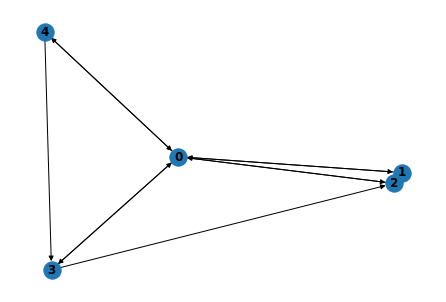

In [174]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(0, 1, 41), (1, 0, -41),
                            (0, 2, 44), (2, 0, -44),
                            (0, 3, 101), (3, 0, -96),
                            (0, 4, 106), (4, 0, -99),
                            (1, 2, -3), (3, 2, -5), (4, 3, -4)])

nx.draw(DG, with_labels=True, font_weight='bold')

minimal_stn = nx.floyd_warshall(DG)

print(minimal_stn)

print("-------------")

print(is_consistent_nx(minimal_stn))

{0: defaultdict(<function floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda> at 0x7f666b51b950>, {0: 0, 1: 41, 2: 45, 3: 101, 4: 106}), 1: defaultdict(<function floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda> at 0x7f666b51b8c8>, {0: -41, 1: 0, 2: 4, 3: 60, 4: 65}), 2: defaultdict(<function floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda> at 0x7f666b51b840>, {0: -45, 1: -4, 2: 0, 3: 56, 4: 61}), 3: defaultdict(<function floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda> at 0x7f666b51b7b8>, {0: -96, 1: -55, 2: -51, 3: 0, 4: 10}), 4: defaultdict(<function floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda> at 0x7f666b51b730>, {0: -100, 1: -59, 2: -55, 3: -4, 4: 0})}
-------------
True


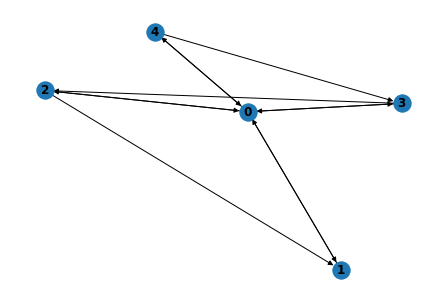

In [173]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(0, 1, 41), (1, 0, -41),
                            (0, 2, 45), (2, 0, -45),
                            (0, 3, 101), (3, 0, -96),
                            (0, 4, 106), (4, 0, -100),
                            (2, 1, -4), (3, 2, -7), (4, 3, -4)])

nx.draw(DG, with_labels=True, font_weight='bold')

minimal_stn = nx.floyd_warshall(DG)

print(minimal_stn)

print("-------------")

print(is_consistent_nx(minimal_stn))

In [172]:
def is_consistent_nx(minimal_stn):
    consistent = True
    for vertex, vertices in minimal_stn.items():
#         print(vertex)
#         print(vertices)
#         print(vertices[vertex])
        
        if vertices[vertex] != 0:
            consistent = False
    return consistent

        

In [138]:
def floyd_warshall(stn):
    n_vertices = len(stn)
    for k in range(0, n_vertices):
        for i in range(0, n_vertices):
            for j in range(0, n_vertices):
                if stn[i][j] > stn[i][k] + stn[k][j]:
                    stn[i][j] = stn[i][k] + stn[k][j]
    return stn

In [141]:
def is_consistent(minimal_stn):
    consistent = True
    n_vertices = len(minimal_stn)
    # check for negative cycles
    for i in range(0, n_vertices):
        if minimal_stn[i][i] != 0:
            consistent = False

    return consistent

In [145]:
# Example STN with 2 tasks
edges = list()
stn = list()
n_vertices = 5

edges.append([0, 1, 41])
edges.append([1, 0, -41])
edges.append([0, 2, 45])
edges.append([2, 0, -45])
edges.append([0, 3, 101])
edges.append([3, 0, -96])
edges.append([0, 4, 106])
edges.append([4, 0, -100])
edges.append([2, 1, -4])
edges.append([3, 2, -7])
edges.append([4, 3, -4])

for i in range(0, n_vertices):
    stn.append([])
    for j in range(0, n_vertices):
        stn[i].append(float('Inf'))
        
# Store edges with their weights
for i in range(0, len(edges)):
    for info in edges:
        start_point = info[0]
        end_point = info[1]
        weight = info[2]
        stn[start_point][end_point] = weight

# Set paths of each vertex to itself to zero
for i in range(0, n_vertices):
    stn[i][i] = 0

print("STN")
print(stn)

minimal_stn = floyd_warshall(stn)
print("Minimal STN")
print(minimal_stn)

print (is_consistent(minimal_stn))

STN
[[0, 41, 45, 101, 106], [-41, 0, inf, inf, inf], [-45, -4, 0, inf, inf], [-96, inf, -7, 0, inf], [-100, inf, inf, -4, 0]]
Minimal STN
[[0, 41, 45, 101, 106], [-41, 0, 4, 60, 65], [-45, -4, 0, 56, 61], [-96, -55, -51, 0, 10], [-100, -59, -55, -4, 0]]
True
